# Intro to torch and autograd

In [1]:
import torch
# height is an input feature
x = torch.tensor(183.0, requires_grad=False)
x

tensor(183.)

In [2]:
# assume that this was randomly initialized
w = torch.tensor(0.78, requires_grad=True)
w

tensor(0.7800, requires_grad=True)

In [3]:
# y_hat is a prediction
y_hat = w * x
y_hat

tensor(142.7400, grad_fn=<MulBackward0>)

In [4]:
y = 40.0
# absolute error is a loss function, a measure for how bad our prediction is
absolute_error = torch.abs(y - y_hat)
absolute_error

tensor(102.7400, grad_fn=<AbsBackward0>)

In [5]:
# We call .backward() on the loss value to compute gradient
absolute_error.backward()

In [7]:
# Computing the gradient with backward() is the main task of PyTorch
w.grad

tensor(183.)

## Autograd in PyTorch explained
PyTorch uses a system called Autograd. 
It builds a computational graph as you do operations with tensors that have requires_grad=True. 

Each operation (like addition, multiplication) is a node in this graph.

When you call .backward() on a scalar (like loss), PyTorch:
1.	Starts from the end (the loss).
2.	Traverses the graph backward, using the chain rule of calculus.
3.	Computes gradients of each tensor involved in producing the loss.
4.	Stores these gradients in .grad attribute of each tensor.

In [8]:
# Define input and weights with requires_grad=True to track gradients
x = torch.tensor([2.0], requires_grad=True)
w = torch.tensor([3.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

# Simple linear model: y = w * x + b
y = w * x + b

# Let's say the target is 10, and we use MSE loss
target = torch.tensor([10.0])
loss = (y - target) ** 2  # MSE: (prediction - target)^2

# Compute gradients
loss.backward()

# Now x.grad, w.grad, and b.grad hold the gradients
print(f"Gradient w.r.t x: {x.grad}")
print(f"Gradient w.r.t w: {w.grad}")
print(f"Gradient w.r.t b: {b.grad}")

Gradient w.r.t x: tensor([-18.])
Gradient w.r.t w: tensor([-12.])
Gradient w.r.t b: tensor([-6.])


# Use of prebuilt PyTorch datasets

In [9]:
import torchvision

raw_train_dataset = torchvision.datasets.MNIST("./data/", train=True, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 10.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 292kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.70MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.71MB/s]


In [16]:
raw_train_dataset.data.shape

torch.Size([60000, 28, 28])

In [10]:
raw_train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [11]:
raw_train_dataset[0][0]

In [14]:
raw_train_dataset[0][1]

5

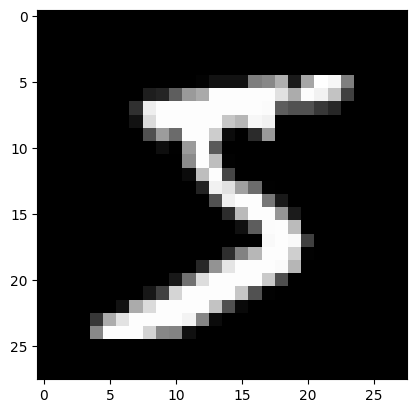

In [12]:
import matplotlib.pyplot as plt
plt.imshow(raw_train_dataset[0][0], cmap="gray");


In [13]:
import numpy as np
np.array(raw_train_dataset[0][0])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
np.exp(np.array(raw_train_dataset[0][0]))

/var/folders/l4/vd99d1jj46l4pg5l2_852z280000gn/T/ipykernel_78070/1827851940.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(np.array(raw_train_dataset[0][0]))


array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
      

In [18]:
np.exp(np.array(raw_train_dataset[0][0]) / 255.0)

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.    

# Create a dataset from a csv file

In [21]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/andandandand/practical-computer-vision/refs/heads/main/artifacts/first_five_mnist.csv", index_col="Unnamed: 0")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
len(df)

5

In [23]:
# first row and first column of the dataframe, label
df.iloc[0, 0]

np.int64(1)

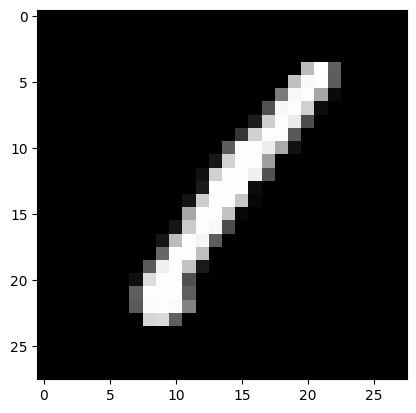

In [24]:
# this is the image in uint8 values
plt.imshow(df.iloc[0, 1:].values.reshape(28, 28), cmap="gray");

In [25]:
# this converts the input to numpy float32, for us to do computations with the weights inside the neural network
df.iloc[0, 1:].values.astype(np.float32);

In [26]:
import torchvision.transforms.v2 as transforms

transform = transforms.Compose([transforms.ToImage(),
                                transforms.ToDtype(torch.float32, scale=True)])

train_transform = transforms.Compose([transforms.ToImage(),
                                      transforms.ToDtype(torch.float32, scale=True),
                                      transforms.RandomRotation(30)])

In [27]:
transform(raw_train_dataset[0][0])

Image([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [28]:
np_array = df.iloc[0, 1:].values.reshape(28, 28)
np_array.shape

(28, 28)

In [29]:
transform(np_array).shape

torch.Size([1, 28, 28])

In [30]:
transform(np_array)

Image([[[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.000

In [32]:
1.3336e-17, 1.3336 * 10**-17

(1.3336e-17, 1.3336e-17)

In [33]:
# Define the MNIST Dataset class, we need to define this in the Kaggle Digit Recognizer competition
# This is a tutorial example that demonstrates how to create a dataset from scratch in PyTorch

class MNISTDataset(torch.utils.data.Dataset):
  def __init__(self, dataframe, labels=True, transform=None):
    self.data = dataframe
    self.labels = labels
    self.transform = transform


  def __len__(self):
    """gives how many items we have inside the dataset"""
    return len(self.data)


  def __getitem__(self, idx):
    """gives a single item from the dataset, both the image and the label associated to it"""
    if self.labels:
      """this is the behavior for training data, where we have labels"""
      image = self.data.iloc[idx, 1:].values.astype(np.float32).reshape(28, 28)
      label = self.data.iloc[idx, 0]
    else:
      """this is the behavior for test data, where we don't have labels"""
      image = self.data.iloc[idx, :].values.astype(np.float32).reshape(28, 28)
      label = None

    if self.transform is not None:
      image = self.transform(image)


    # ensure that label tensors are detached
    label = torch.tensor(label).detach().long()

    return image, label


In [34]:
sample_mnist_dataset = MNISTDataset(df,labels=True, transform=transform)
first_image, first_label = sample_mnist_dataset[0]
first_image.shape, first_label

(torch.Size([1, 28, 28]), tensor(1))

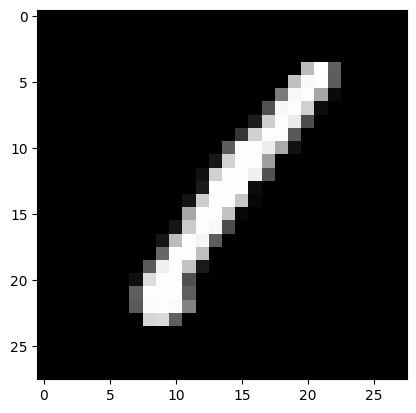

In [35]:
plt.imshow(first_image.squeeze(), cmap="gray");

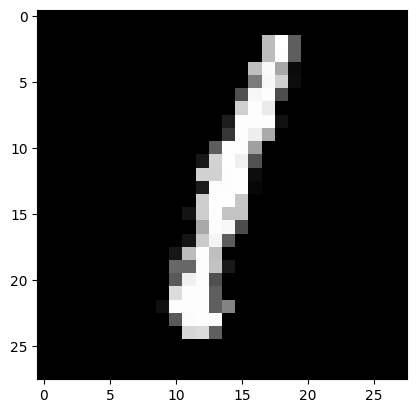

In [36]:
plt.imshow(train_transform(first_image).squeeze(), cmap="gray");